In [1]:
%matplotlib inline

from heapq import*

import random as rd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import TSP

In [2]:
# warehouse_nodeを読んで、使わないノードを経由したルートを作る(start_node,end_node,最短距離,最短距離の経由方法)
# 全点よりダイクストラをして、他の点への最短ルートと最短距離を記録

def DIJKSTRA(point,d):
    cost      = [float("inf")]*n
    path      = [[]for i in range(n)]
    Q         = []
    cost[point]=0
    path[point]=[point]
    heappush(Q,(point,cost[point],path[point]))
    while Q:
        prefnd,tmpC,tmpP=heappop(Q)
        if cost[prefnd]<tmpC:
            continue
        for node,c in d[prefnd]:
            altC=c+tmpC
            altP=tmpP+[node]
            if cost[node]>altC:
                path[node]=altP
                cost[node]=altC
                heappush(Q,(node,altC,altP))
    return cost,path

dfnode=pd.read_excel("./warehouse_node.xlsx").fillna("")

n=max(dfnode["node_number"])+1
d=[[]for i in range(n)]

nodelist=pd.concat([dfnode.loc[:,"node_number"],dfnode.loc[:,"connect_node_1":"connect_node_4"]],axis=1).values.tolist()

d={ line[0]:[int(num) for num in line[1:] if type(num)!=str] for line in nodelist}
d={k:[(i,1)for i in v] for k,v in d.items()}

toexcel=[["start","end","cost","root"]]
for start in range(n):
    c,p=DIJKSTRA(start,d)
    for end,cost,path in zip(range(n),c,p):
        toexcel.append([start,end,cost,",".join(map(str,path))])

pd.DataFrame(toexcel).to_excel("./warehouse_root.xlsx",header=None,index=None)

In [3]:
# 仮想ピッキングクエリー作成

inventry=[chr(i+65) for i in range(26)]+[chr(i+97) for i in range(6)]

l=[]
for i in range(100):
    num=rd.randint(1,10)

    l.append("start,"+",".join( sorted(set(inventry[rd.randint(0,len(inventry)-1)]for i in range(num))) ))

pd.DataFrame(l).to_excel("query.xlsx",header=None,index=None)

In [4]:



dfroot=pd.read_excel("warehouse_root.xlsx").values.tolist()
dfwii ={name:node for name,node in pd.read_excel("where_is_inventry.xlsx").values.tolist()}
query =pd.read_excel("query.xlsx",header=None).values.tolist()

for q in query:
    print(q[0])
    q=set([dfwii[name]for name in q[0].split(",")])
    n=len(q)
    oldtonew={node:newnode for newnode,node in enumerate(q)}
    newtoold={newnode:node for node,newnode in oldtonew.items()}
    dist = {(oldtonew[start],oldtonew[end]):cost for start,end,cost,root in dfroot if start>end and start in q and end in q}
#    print(dist)
    try:
        root,cost=TSP.main(n,dist)
        root=[newtoold[i]for i in root]
        print(root,cost)
    except:
        root=list(q)
        cost=sum(dist.values())*2
        print(root,cost)

#print(points)
#print(dist)


start,C,I,L,O,S,X,Z,c,f
Using license file C:\Users\kyle\gurobi.lic
Academic license - for non-commercial use only
[6, 12, 13, 24, 29, 27, 26, 21, 10, 15] 26.0
start,C,W
[23, 6, 15] 12.0
start,C,G,J,N,Y,b
[6, 8, 13, 27, 25, 15, 11] 18.0
start,D,F,I,P,Q,X,Z,c
[7, 8, 14, 24, 27, 26, 15, 20, 10] 28.0
start,B,E,J,N,V,Y,f
[6, 7, 13, 23, 29, 25, 15, 11] 24.0
start,O,Y,c,f
[13, 15, 25, 27, 29] 18.0
start,W
[23, 15] 8
start,A,D,E,H,S,W,X,Y,b
[5, 7, 9, 24, 23, 27, 21, 25, 15] 30.0
start,T,c
[27, 15, 22] 8.0
start,L,X,b
[24, 12, 15, 27] 16.0
start,G,K,T
[8, 15, 11, 22] 14.0
start,G,L,R,W,X,a,b,f
[8, 23, 12, 15, 21, 26, 27, 29, 24] 24.0
start,D,F,J,N,T,Z,b,f
[7, 8, 13, 29, 27, 26, 11, 15, 22] 26.0
start,D,I,L,N,Q,U,Z,e
[7, 10, 15, 20, 26, 28, 13, 22, 12] 24.0
start,C,M,N,P,Y,d,e
[6, 12, 14, 13, 28, 25, 15] 24.0
start,F,K,W,f
[8, 15, 11, 23, 29] 20.0
start,O
[13, 15] 8
start,D,K
[11, 7, 15] 10.0
start,A,D,E,F,J,V,e
[5, 7, 8, 28, 23, 11, 15] 20.0
start,B,K,M,P,V,Y,Z,e
[6, 11, 15, 25, 26, 28, 23, 14

{'0': (0, 0), '1': (1, 0), '2': (2, 0), '3': (3, 0), '4': (4, 0), '5': (0, -1), '6': (1, -1), '7': (2, -1), '8': (3, -1), '9': (4, -1), '10': (0, -2), '11': (1, -2), '12': (2, -2), '13': (3, -2), '14': (4, -2), '15': (0, -3), '16': (1, -3), '17': (2, -3), '18': (3, -3), '19': (4, -3), '20': (0, -4), '21': (1, -4), '22': (2, -4), '23': (3, -4), '24': (4, -4), '25': (0, -5), '26': (1, -5), '27': (2, -5), '28': (3, -5), '29': (4, -5), '30': (0, -6), '31': (1, -6), '32': (2, -6), '33': (3, -6), '34': (4, -6)}


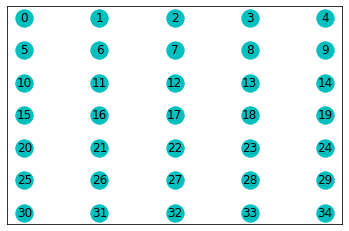

In [5]:

dfnode=pd.read_excel("warehouse_node.xlsx")

G=nx.Graph()
G.add_nodes_from([str(i)for i in dfnode["node_number"]])
pos={str(num):(x,-y) for num,x,y in zip(dfnode["node_number"],dfnode["point_x"],dfnode["point_y"])}
print(pos)
# 指定した座標を用いてグラフを可視化する


nx.draw_networkx(G, pos=pos, node_color="c")

plt.show()